In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
A = np.loadtxt("fission_matrix.txt")
num_bins = A.shape[0]
A = np.asmatrix(A)
format_A = np.array(A)
formatted_A = "\n".join([" ".join(["{:.5f}".format(value) for value in row]) for row in format_A])
print(formatted_A)

B = np.zeros(num_bins)
for i in range(num_bins):
    for j in range(num_bins):
        B[j] += np.sum(A[i,j])

print(B)

0.47550 0.23962 0.13143 0.08299 0.05551 0.03803 0.02669 0.01908 0.01387 0.01002 0.00747 0.00544 0.00411 0.00315 0.00236 0.00184 0.00153 0.00121 0.00101 0.00101
0.23910 0.36872 0.19075 0.10392 0.06544 0.04409 0.03003 0.02144 0.01528 0.01118 0.00809 0.00585 0.00438 0.00330 0.00258 0.00193 0.00154 0.00129 0.00109 0.00104
0.13125 0.19081 0.34049 0.17316 0.09217 0.05801 0.03900 0.02668 0.01877 0.01333 0.00979 0.00719 0.00531 0.00393 0.00296 0.00229 0.00187 0.00153 0.00131 0.00121
0.08311 0.10419 0.17348 0.32896 0.16580 0.08739 0.05415 0.03612 0.02490 0.01750 0.01232 0.00894 0.00654 0.00482 0.00367 0.00280 0.00218 0.00185 0.00158 0.00143
0.05562 0.06578 0.09284 0.16613 0.32396 0.16168 0.08472 0.05246 0.03467 0.02369 0.01673 0.01189 0.00872 0.00647 0.00481 0.00363 0.00285 0.00237 0.00203 0.00189
0.03794 0.04377 0.05801 0.08724 0.16202 0.32173 0.15937 0.08308 0.05178 0.03383 0.02312 0.01623 0.01158 0.00838 0.00624 0.00484 0.00367 0.00299 0.00256 0.00236
0.02690 0.03037 0.03872 0.05427 0.08466 

# Direct Calculation

In [25]:
inv_eigenvalues, inv_eigenvectors = np.linalg.eig(A)

sorted_inv_indices = np.argsort(inv_eigenvalues)[::-1]
sorted_inv_eigenvalues = inv_eigenvalues[sorted_inv_indices]
sorted_inv_eigenvectors = inv_eigenvectors[:, sorted_inv_indices]

for index in range(num_bins):
  print(f"Eigenvalue {index}: {sorted_inv_eigenvalues[index]}")
  print(f"Eigenvector {index}:\n{sorted_inv_eigenvectors[:, index]}")

Eigenvalue 0: 1.1217063086989674
Eigenvector 0:
[[0.22347919]
 [0.22328701]
 [0.22331085]
 [0.22351315]
 [0.22381612]
 [0.22333439]
 [0.22360476]
 [0.22352187]
 [0.22385787]
 [0.22359098]
 [0.22355108]
 [0.22363579]
 [0.22361235]
 [0.2237656 ]
 [0.22386735]
 [0.22363965]
 [0.22354199]
 [0.22407424]
 [0.22364589]
 [0.22348418]]
Eigenvalue 1: 0.98215889527117
Eigenvector 1:
[[ 0.31516227]
 [ 0.3075642 ]
 [ 0.29187811]
 [ 0.26982931]
 [ 0.24065695]
 [ 0.20522381]
 [ 0.16533076]
 [ 0.12096146]
 [ 0.07387706]
 [ 0.02475183]
 [-0.02513033]
 [-0.07388572]
 [-0.12098174]
 [-0.16540616]
 [-0.20561641]
 [-0.24041523]
 [-0.26940912]
 [-0.29253198]
 [-0.30748158]
 [-0.31486849]]
Eigenvalue 2: 0.7649031933898827
Eigenvector 2:
[[ 0.31203915]
 [ 0.2818923 ]
 [ 0.22314203]
 [ 0.14348812]
 [ 0.0495677 ]
 [-0.04978971]
 [-0.14386978]
 [-0.22378402]
 [-0.28272911]
 [-0.31268362]
 [-0.31205726]
 [-0.28204178]
 [-0.22344262]
 [-0.14343137]
 [-0.04919465]
 [ 0.04938977]
 [ 0.14345818]
 [ 0.22376737]
 [ 0.2

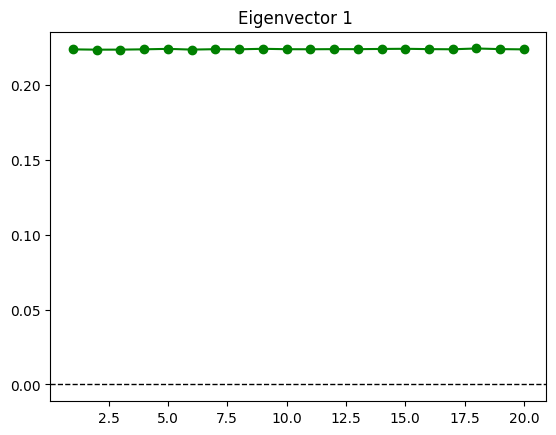

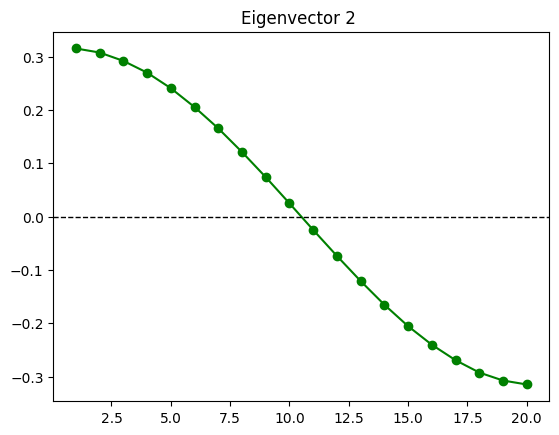

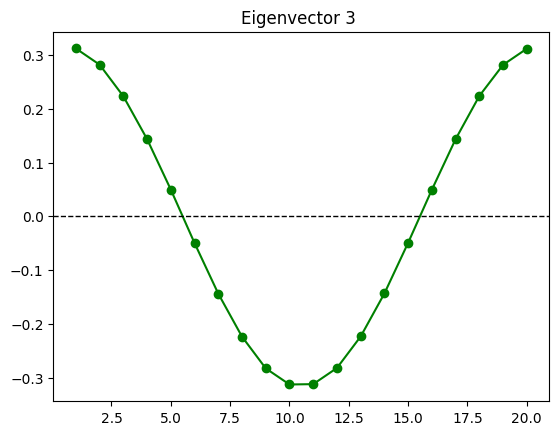

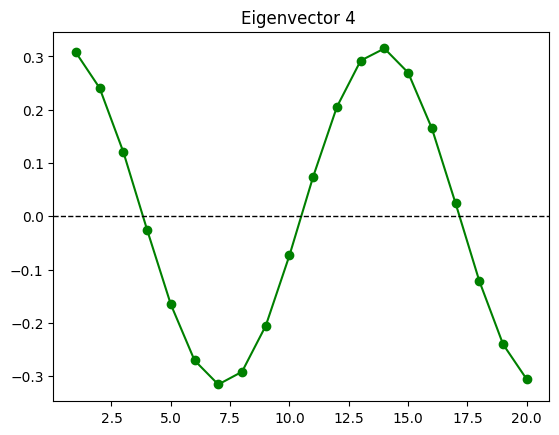

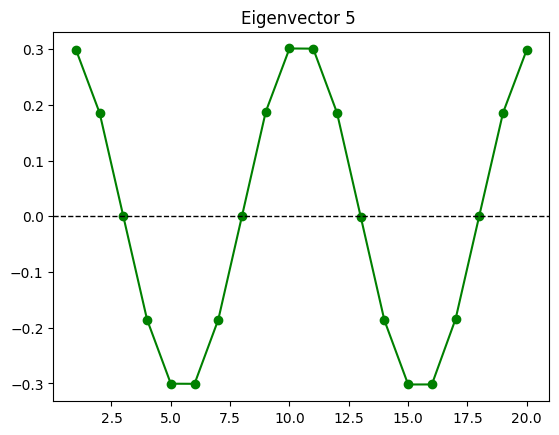

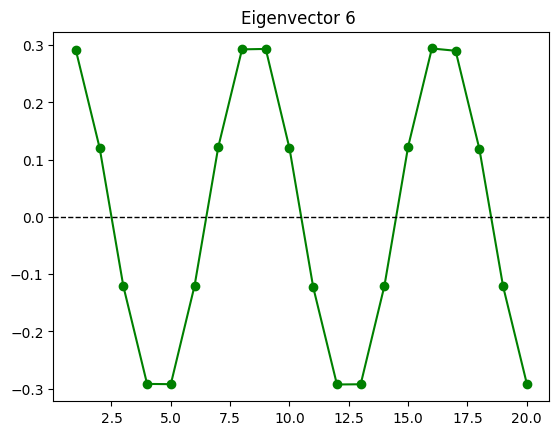

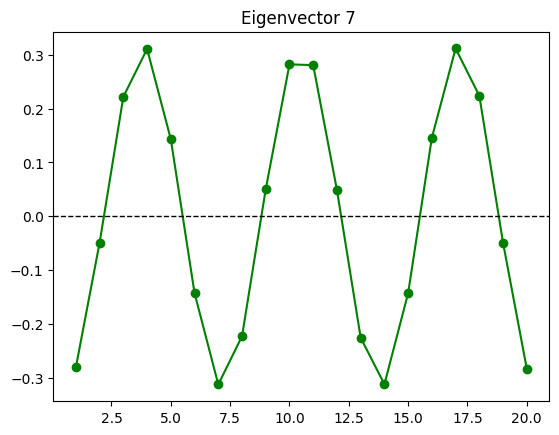

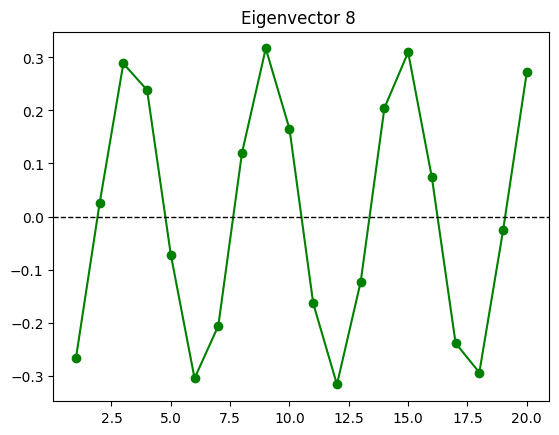

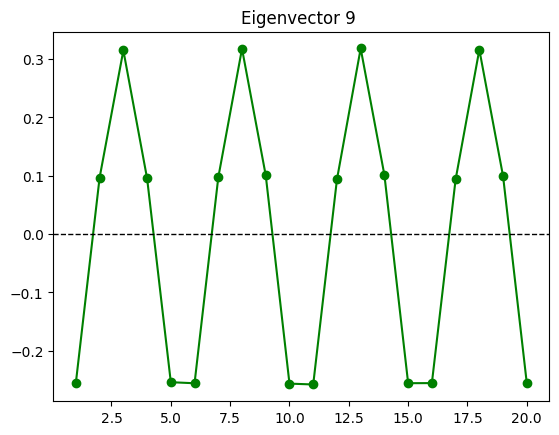

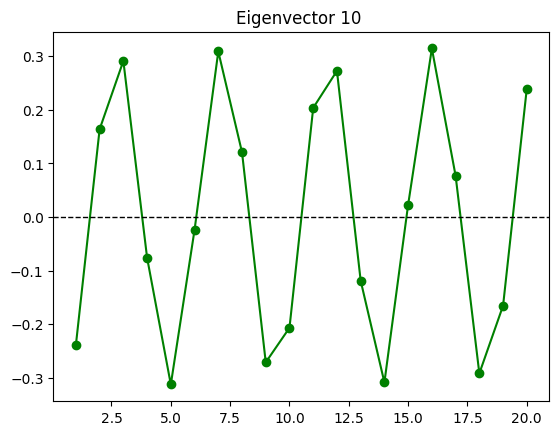

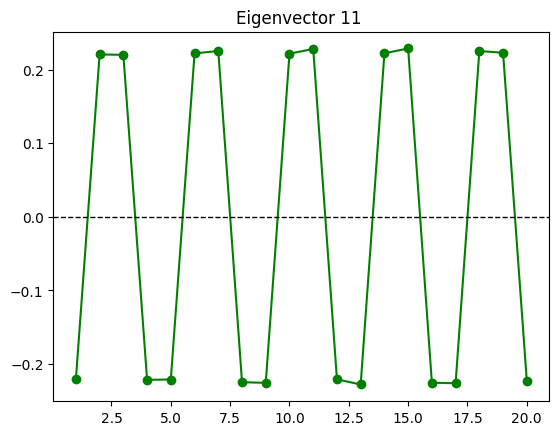

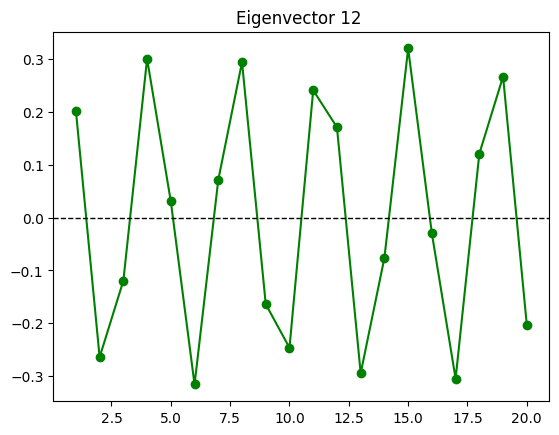

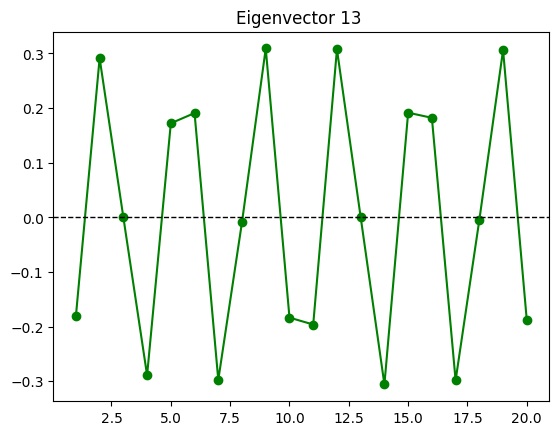

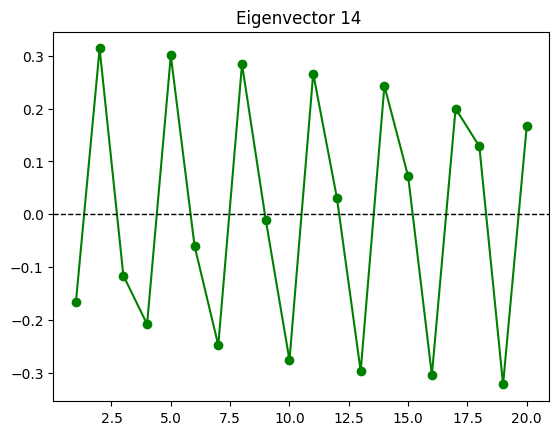

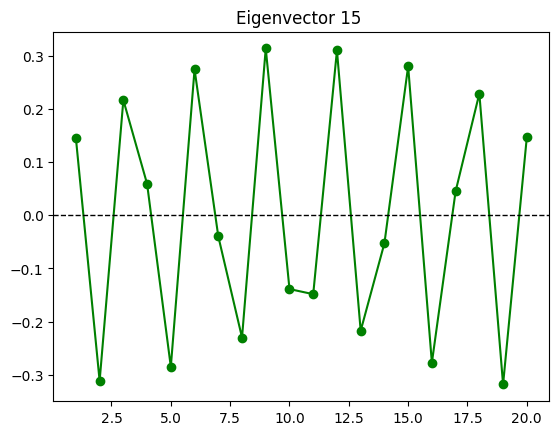

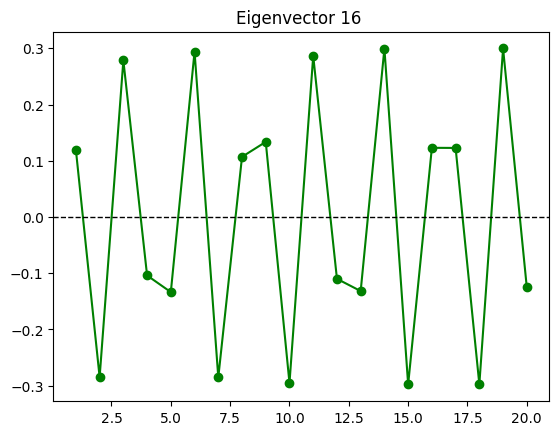

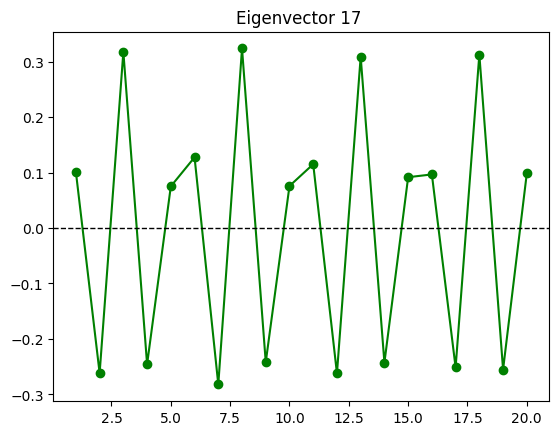

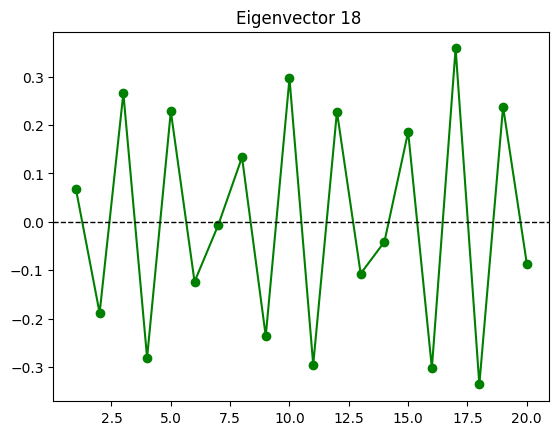

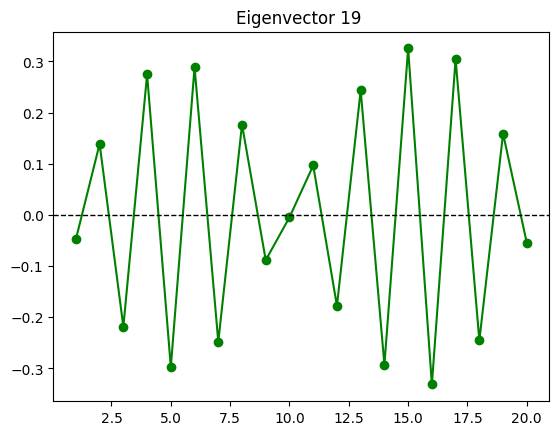

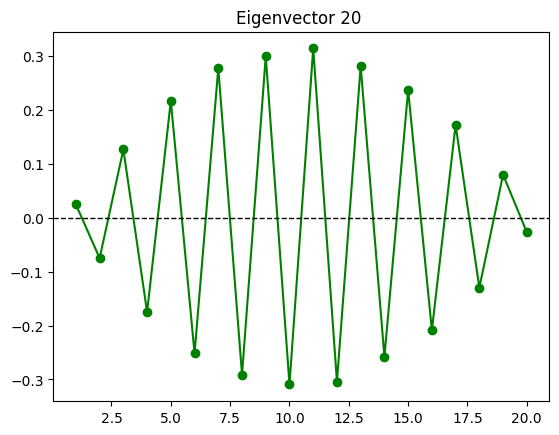

In [26]:
sorted_inv_eigenvectors_array = np.array(sorted_inv_eigenvectors)

x = np.arange(1, num_bins+1)

for i in range(sorted_inv_eigenvectors.shape[0]):
    y2 = sorted_inv_eigenvectors_array[:,i]
    plt.plot(x, y2, marker='o', color = 'green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
    plt.title(f"Eigenvector {i+1} ")
    plt.show()

# Power Method

In [27]:
def power_method(A, x0):
    iteration = 1000
    x_old = x0 
    lambda_old = 1.0
    coefficients = np.zeros((num_bins, iteration))
    lambda_array = []

    for i in range(iteration):
        x_new = np.dot(A, x_old)
        lambda_new = np.dot(np.dot(A, x_new).T, x_new)/np.dot(x_new.T, x_new)
        lambda_array.append(lambda_new.item())
        x_new /= lambda_new

        for j in range(num_bins):
            coefficients[j][i] = np.dot(sorted_inv_eigenvectors[:,j].T, x_new).item()/np.dot(sorted_inv_eigenvectors[:,j].T, sorted_inv_eigenvectors[:,j]).item()

        if (np.linalg.norm(x_new - x_old)/np.linalg.norm(x_new) < 10**(-5) and abs(lambda_new - lambda_old)/lambda_new < 10**(-5)):
            break
        
        lambda_old = lambda_new
        x_old = x_new
    
    x_new /= np.linalg.norm(x_new)
    eigenvalue = lambda_new
    iteration = i

    return x_new, eigenvalue, coefficients, lambda_array, iteration

In [28]:
x_rand = np.matrix(np.random.randn(num_bins))
x_rand = x_rand.T
x_rand /= np.linalg.norm(x_rand)

ra_eigenvector1, ra_eigenvalue1, ra_coefficients, ra_lambda_array, ra_iteration = power_method(A, x_rand)

In [29]:
dominance_ratio = (-5)/np.log10(abs(sorted_inv_eigenvalues[1]/sorted_inv_eigenvalues[0]))
print(dominance_ratio)
print(f"random iterration: {ra_iteration}")

86.65900540257655
random iterration: 72


In [30]:
def print_result(eigenvalue, eigenvector):
    print("eigenvalue:", eigenvalue)
    print("eigenvector:")
    print(eigenvector)

print_result(ra_eigenvalue1.item(), ra_eigenvector1)

eigenvalue: 1.1217063128620446
eigenvector:
[[0.22349889]
 [0.22330623]
 [0.2233291 ]
 [0.22353002]
 [0.22383117]
 [0.22334723]
 [0.2236151 ]
 [0.22352944]
 [0.2238625 ]
 [0.22359253]
 [0.22354951]
 [0.22363118]
 [0.2236048 ]
 [0.22375527]
 [0.22385451]
 [0.22362463]
 [0.22352515]
 [0.22405596]
 [0.22362668]
 [0.22346451]]


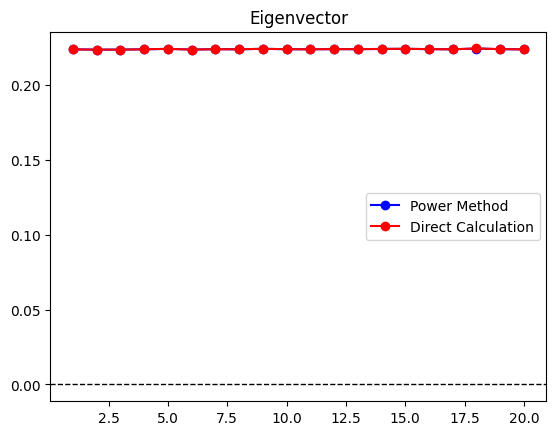

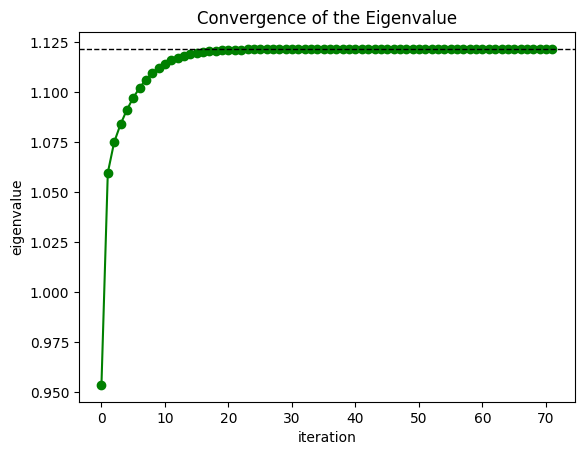

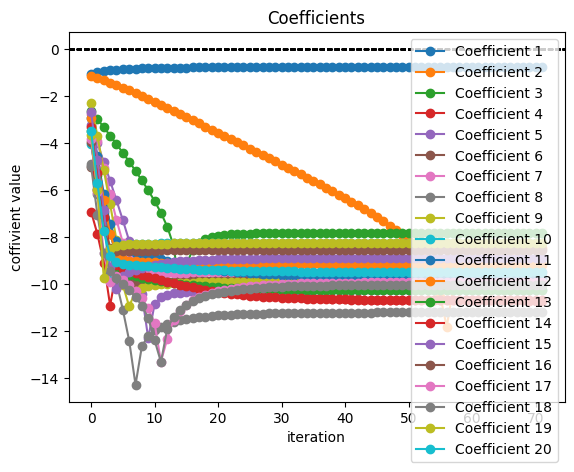

In [31]:
X = np.arange(1, num_bins+1)
Y1 = ra_eigenvector1
Y2 = sorted_inv_eigenvectors_array[:,0]
plt.plot(X, Y1, marker='o', color='blue', label = 'Power Method')
plt.plot(X, Y2, marker='o', color='red', label = 'Direct Calculation')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
plt.legend()
plt.title("Eigenvector")
plt.show()

X = np.arange(0, ra_iteration)
Y1 = ra_lambda_array[0:ra_iteration]
plt.plot(X, Y1, marker='o', color = 'green')
plt.xlabel("iteration")
plt.ylabel("eigenvalue")
plt.axhline(y=sorted_inv_eigenvalues[0], color='black', linestyle='--', linewidth=1,)
plt.title("Convergence of the Eigenvalue")
plt.show()

X = np.arange(0, ra_iteration)
for i in range(num_bins):
    Y = np.log(abs(ra_coefficients[i][0:ra_iteration]))
    plt.plot(X, Y, marker='o', label=f'Coefficient {i+1}')
    plt.xlabel("iteration")
    plt.ylabel("coffivient value")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
    plt.title("Coefficients")
plt.legend()
plt.show()

# Deflation

## **1. Wielandt Deflation Method**

In [32]:
A1 = np.dot(ra_eigenvector1,ra_eigenvector1.T)
new_A = A - ra_eigenvalue1.item() * A1

coefficients = np.zeros(num_bins)
for j in range(num_bins):
    coefficients[j] = abs(np.dot(ra_eigenvector1.T, x_rand).item()/np.dot(ra_eigenvector1.T, ra_eigenvector1).item())

ra_eigenvector2, ra_eigenvalue2, ra_coefficients2, ra_lambda_array2, ra_iteration2 = power_method(new_A, x_rand)

In [33]:
print(f"iterration: {ra_iteration2}")
print()
print("<Power Method>")
print_result(ra_eigenvalue2.item(), ra_eigenvector2)
print()
print("<Direct Calculation Using the Matrix>")
print_result(sorted_inv_eigenvalues[1], sorted_inv_eigenvectors[:,1])

iterration: 36

<Power Method>
eigenvalue: 0.9821588905181866
eigenvector:
[[ 0.31529281]
 [ 0.30769379]
 [ 0.29200609]
 [ 0.26995518]
 [ 0.24078039]
 [ 0.20534423]
 [ 0.1654487 ]
 [ 0.12107713]
 [ 0.07399128]
 [ 0.02486506]
 [-0.0250171 ]
 [-0.07377163]
 [-0.12086604]
 [-0.16528816]
 [-0.20549575]
 [-0.24029197]
 [-0.26928331]
 [-0.29240365]
 [-0.30735189]
 [-0.31473805]]

<Direct Calculation Using the Matrix>
eigenvalue: 0.98215889527117
eigenvector:
[[ 0.31516227]
 [ 0.3075642 ]
 [ 0.29187811]
 [ 0.26982931]
 [ 0.24065695]
 [ 0.20522381]
 [ 0.16533076]
 [ 0.12096146]
 [ 0.07387706]
 [ 0.02475183]
 [-0.02513033]
 [-0.07388572]
 [-0.12098174]
 [-0.16540616]
 [-0.20561641]
 [-0.24041523]
 [-0.26940912]
 [-0.29253198]
 [-0.30748158]
 [-0.31486849]]


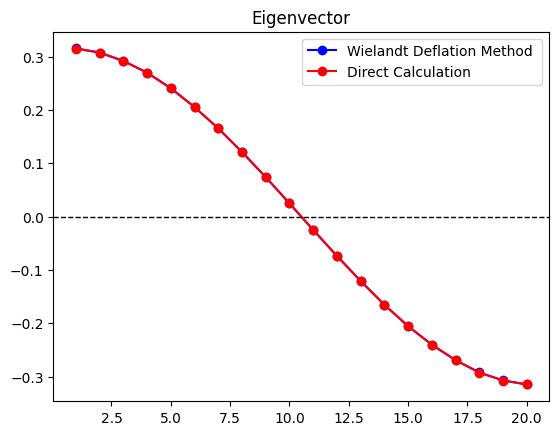

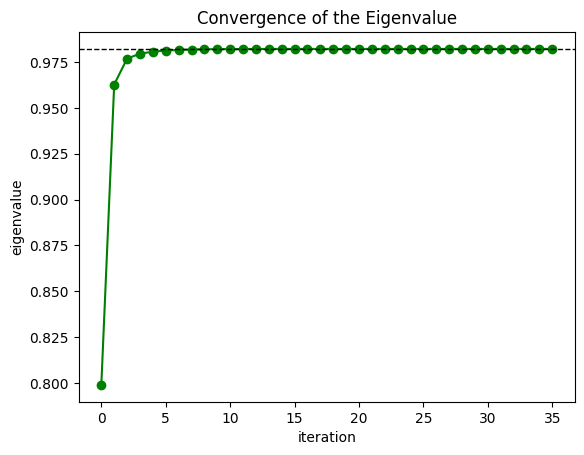

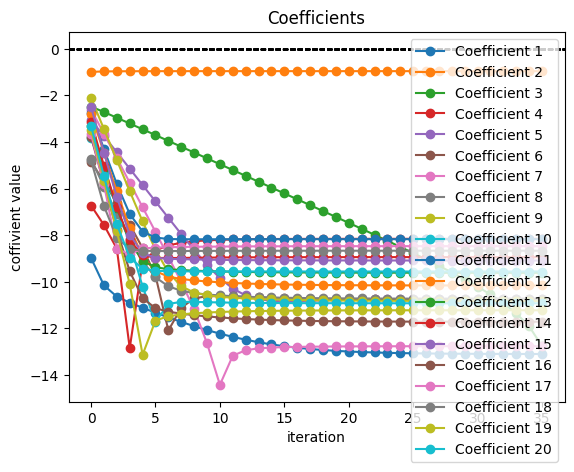

In [34]:
X = np.arange(1, num_bins+1)
Y1 = ra_eigenvector2
Y2 = sorted_inv_eigenvectors_array[:,1]
plt.plot(X, Y1, marker='o', color='blue', label = 'Wielandt Deflation Method ')
plt.plot(X, Y2, marker='o', color='red', label = 'Direct Calculation')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
plt.legend()
plt.title("Eigenvector")
plt.show()

X = np.arange(0, ra_iteration2)
Y1 = ra_lambda_array2[0:ra_iteration2]
plt.plot(X, Y1, marker='o', color = 'green')
plt.xlabel("iteration")
plt.ylabel("eigenvalue")
plt.axhline(y=sorted_inv_eigenvalues[1], color='black', linestyle='--', linewidth=1,)
plt.title("Convergence of the Eigenvalue")
plt.show()

X = np.arange(0, ra_iteration2)
for i in range(num_bins):
    Y = np.log(abs(ra_coefficients2[i][0:ra_iteration2]))
    plt.plot(X, Y, marker='o', label=f'Coefficient {i+1}')
    plt.xlabel("iteration")
    plt.ylabel("coffivient value")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
    plt.title("Coefficients")
plt.legend()
plt.show()

In [35]:
A2 = np.dot(ra_eigenvector2,ra_eigenvector2.T)
new_A = new_A - ra_eigenvalue2.item() * A2

ra_eigenvector3, ra_eigenvalue3, ra_coefficients3, ra_lambda_array3, ra_iteration3 = power_method(new_A, x_rand)

In [36]:
print(f"iterration: {ra_iteration3}")
print()
print("<Power Method>")
print_result(ra_eigenvalue3.item(), ra_eigenvector3)
print()
print("<Direct Calculation Using the Matrix>")
print_result(sorted_inv_eigenvalues[2], sorted_inv_eigenvectors[:,2])

iterration: 25

<Power Method>
eigenvalue: 0.7649031937223884
eigenvector:
[[ 0.31233517]
 [ 0.28218512]
 [ 0.22342969]
 [ 0.14377001]
 [ 0.0498446 ]
 [-0.04951688]
 [-0.14359733]
 [-0.22350968]
 [-0.28245031]
 [-0.31240013]
 [-0.31176906]
 [-0.28175001]
 [-0.22314935]
 [-0.14313843]
 [-0.04890382]
 [ 0.04967693]
 [ 0.14374146]
 [ 0.22404786]
 [ 0.28188614]
 [ 0.31192462]]

<Direct Calculation Using the Matrix>
eigenvalue: 0.7649031933898827
eigenvector:
[[ 0.31203915]
 [ 0.2818923 ]
 [ 0.22314203]
 [ 0.14348812]
 [ 0.0495677 ]
 [-0.04978971]
 [-0.14386978]
 [-0.22378402]
 [-0.28272911]
 [-0.31268362]
 [-0.31205726]
 [-0.28204178]
 [-0.22344262]
 [-0.14343137]
 [-0.04919465]
 [ 0.04938977]
 [ 0.14345818]
 [ 0.22376737]
 [ 0.28160878]
 [ 0.31164884]]


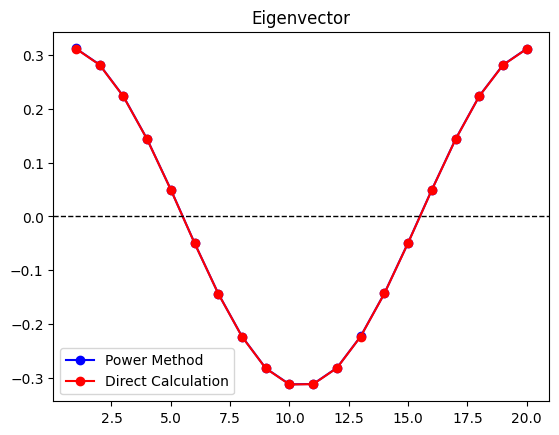

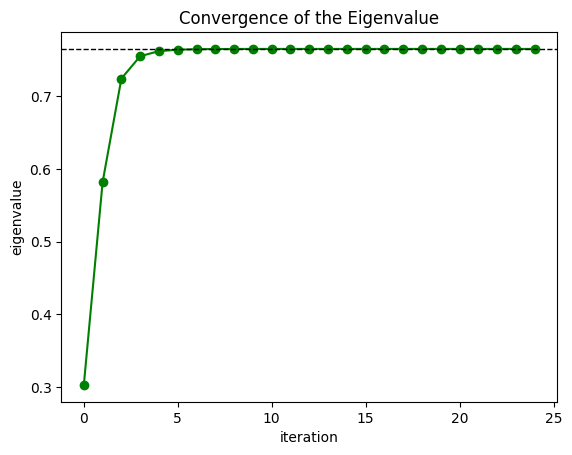

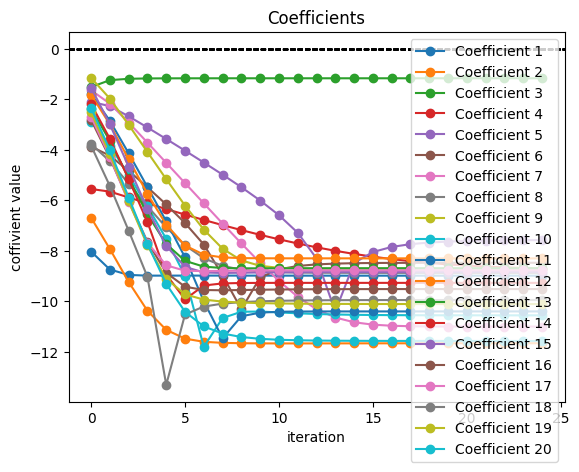

In [37]:
X = np.arange(1, num_bins+1)
Y1 = ra_eigenvector3
Y2 = sorted_inv_eigenvectors_array[:,2]
plt.plot(X, Y1, marker='o', color='blue', label = 'Power Method')
plt.plot(X, Y2, marker='o', color='red', label = 'Direct Calculation')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
plt.legend()
plt.title("Eigenvector")
plt.show()

X = np.arange(0, ra_iteration3)
Y1 = ra_lambda_array3[0:ra_iteration3]
plt.plot(X, Y1, marker='o', color = 'green')
plt.xlabel("iteration")
plt.ylabel("eigenvalue")
plt.axhline(y=sorted_inv_eigenvalues[2], color='black', linestyle='--', linewidth=1,)
plt.title("Convergence of the Eigenvalue")
plt.show()

X = np.arange(0, ra_iteration3)
for i in range(num_bins):
    Y = np.log(abs(ra_coefficients3[i][0:ra_iteration3]))
    plt.plot(X, Y, marker='o', label=f'Coefficient {i+1}')
    plt.xlabel("iteration")
    plt.ylabel("coffivient value")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
    plt.title("Coefficients")
plt.legend()
plt.show()


## **2. Gram-Schmidt Deflation Method**

In [38]:
def gram_schmidt_deflation_method(A, x0, eigenvector_array):
    iteration = 1000
    x_old = x0
    lambda_old = 1.0
    coefficients = np.zeros((num_bins, iteration))
    lambda_array = []

    for i in range(iteration):
        for vector in eigenvector_array:
            c = np.dot(vector.T, x_old).item()
            x_old -= c * vector

        x_new = np.dot(A, x_old)
        lambda_new = np.dot(np.dot(A, x_new).T, x_new)/np.dot(x_new.T, x_new)
        lambda_array.append(lambda_new.item())
        x_new /= lambda_new

        for j in range(num_bins):
            coefficients[j][i] = np.dot(sorted_inv_eigenvectors[:,j].T, x_new).item()/np.dot(sorted_inv_eigenvectors[:,j].T, sorted_inv_eigenvectors[:,j]).item()

        if (np.linalg.norm(x_new - x_old)/np.linalg.norm(x_new) < 10**(-5) and abs(lambda_new - lambda_old)/lambda_new < 10**(-5)):
            break
        
        lambda_old = lambda_new
        x_old = x_new
    
    x_new /= np.linalg.norm(x_new)
    eigenvalue = lambda_new
    iteration = i

    return x_new, eigenvalue, coefficients, lambda_array, iteration

In [39]:
x_ran = np.matrix(np.random.randn(num_bins))
x_ran = x_ran.T
x_ran /= np.linalg.norm(x_ran)

ran_eigenvector1, ran_eigenvalue1, ran_coefficients1, ran_lambda_array1, ran_iteration1 = power_method(A, x_ran)

eigenvector = [ran_eigenvector1]
ran_eigenvector2, ran_eigenvalue2, ran_coefficients2, ran_lambda_array2, ran_iteration2 = gram_schmidt_deflation_method(A, x_ran, eigenvector)

iterration: 999

<Power Method>
eigenvalue: 0.9821589093720625
eigenvector:
[[ 0.31531583]
 [ 0.30771762]
 [ 0.29203155]
 [ 0.26998288]
 [ 0.24081073]
 [ 0.20537726]
 [ 0.16548438]
 [ 0.12111502]
 [ 0.07403085]
 [ 0.02490542]
 [-0.02497676]
 [-0.07373211]
 [-0.12082815]
 [-0.16525247]
 [-0.20546266]
 [-0.24026164]
 [-0.2692556 ]
 [-0.29237809]
 [-0.30732799]
 [-0.31471502]]

<Direct Calculation Using the Matrix>
eigenvalue: 0.98215889527117
eigenvector:
[[ 0.31516227]
 [ 0.3075642 ]
 [ 0.29187811]
 [ 0.26982931]
 [ 0.24065695]
 [ 0.20522381]
 [ 0.16533076]
 [ 0.12096146]
 [ 0.07387706]
 [ 0.02475183]
 [-0.02513033]
 [-0.07388572]
 [-0.12098174]
 [-0.16540616]
 [-0.20561641]
 [-0.24041523]
 [-0.26940912]
 [-0.29253198]
 [-0.30748158]
 [-0.31486849]]


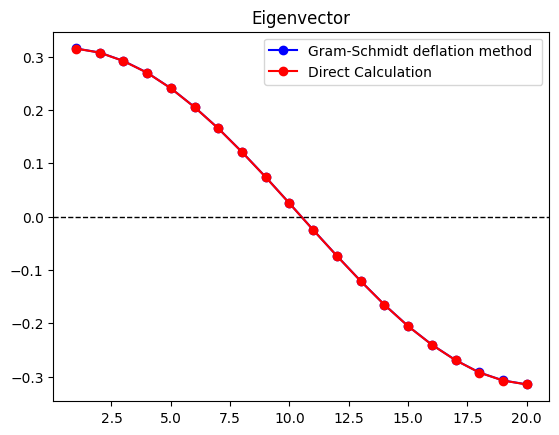

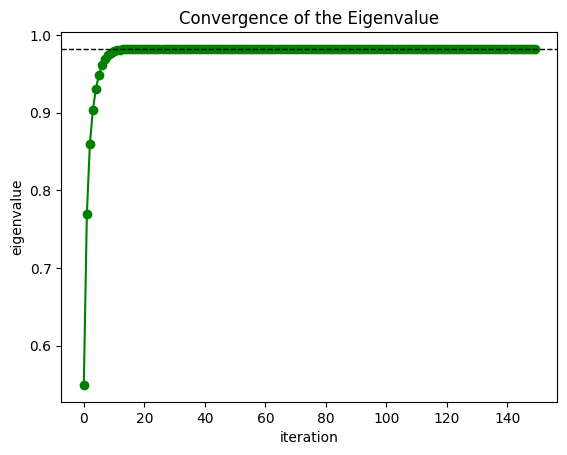

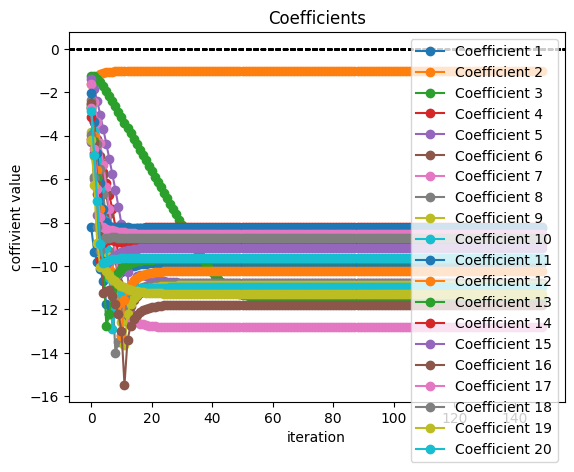

In [40]:
print(f"iterration: {ran_iteration2}")
print()
print("<Power Method>")
print_result(ran_eigenvalue2.item(), ran_eigenvector2)
print()
print("<Direct Calculation Using the Matrix>")
print_result(sorted_inv_eigenvalues[1], sorted_inv_eigenvectors[:,1])

X = np.arange(1, num_bins+1)
Y1 = ran_eigenvector2
Y2 = sorted_inv_eigenvectors_array[:,1]
plt.plot(X, Y1, marker='o', color='blue', label = 'Gram-Schmidt deflation method ')
plt.plot(X, Y2, marker='o', color='red', label = 'Direct Calculation')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
plt.legend()
plt.title("Eigenvector")
plt.show()

X = np.arange(0, 150)
Y1 = ran_lambda_array2[0:150]
plt.plot(X, Y1, marker='o', color = 'green')
plt.xlabel("iteration")
plt.ylabel("eigenvalue")
plt.axhline(y=sorted_inv_eigenvalues[1], color='black', linestyle='--', linewidth=1,)
plt.title("Convergence of the Eigenvalue")
plt.show()

X = np.arange(0, 150)
for i in range(num_bins):
    Y = np.log(abs(ran_coefficients2[i][0:150]))
    plt.plot(X, Y, marker='o', label=f'Coefficient {i+1}')
    plt.xlabel("iteration")
    plt.ylabel("coffivient value")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
    plt.title("Coefficients")
plt.legend()
plt.show()

In [41]:
eigenvector = [ran_eigenvector1, ran_eigenvector2]
ran_eigenvector3, ran_eigenvalue3, ran_coefficients3, ran_lambda_array3, ran_iteration3 = gram_schmidt_deflation_method(A, x_ran, eigenvector)

iterration: 999

<Power Method>
eigenvalue: 0.7649033764240494
eigenvector:
[[-0.31233438]
 [-0.282187  ]
 [-0.22343618]
 [-0.14378171]
 [-0.04986059]
 [ 0.04949875]
 [ 0.14357994]
 [ 0.22349591]
 [ 0.28244229]
 [ 0.31239892]
 [ 0.31177442]
 [ 0.28176057]
 [ 0.22316313]
 [ 0.14315327]
 [ 0.04891784]
 [-0.04966507]
 [-0.14373233]
 [-0.22404139]
 [-0.28188173]
 [-0.31192132]]

<Direct Calculation Using the Matrix>
eigenvalue: 0.7649031933898827
eigenvector:
[[ 0.31203915]
 [ 0.2818923 ]
 [ 0.22314203]
 [ 0.14348812]
 [ 0.0495677 ]
 [-0.04978971]
 [-0.14386978]
 [-0.22378402]
 [-0.28272911]
 [-0.31268362]
 [-0.31205726]
 [-0.28204178]
 [-0.22344262]
 [-0.14343137]
 [-0.04919465]
 [ 0.04938977]
 [ 0.14345818]
 [ 0.22376737]
 [ 0.28160878]
 [ 0.31164884]]


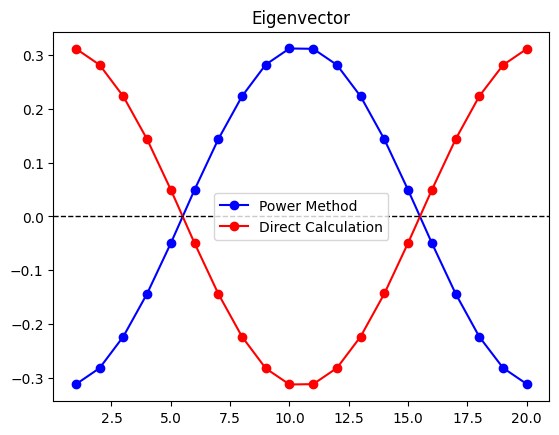

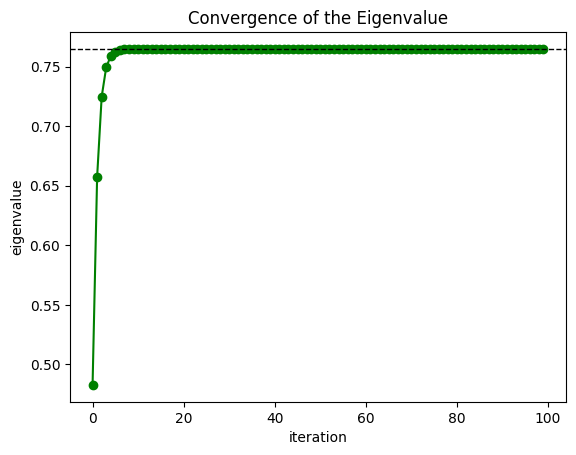

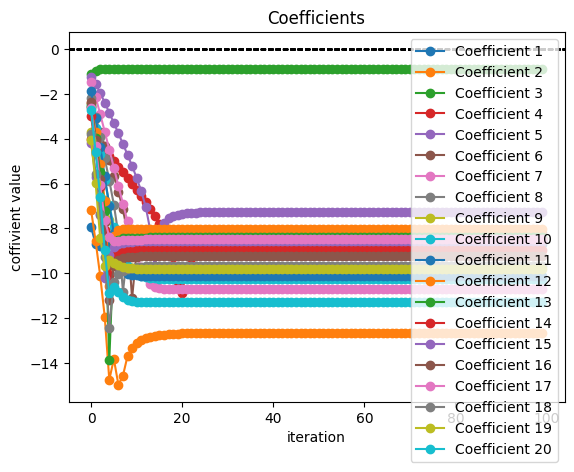

In [42]:
print(f"iterration: {ran_iteration3}")
print()
print("<Power Method>")
print_result(ran_eigenvalue3.item(), ran_eigenvector3)
print()
print("<Direct Calculation Using the Matrix>")
print_result(sorted_inv_eigenvalues[2], sorted_inv_eigenvectors[:,2])

X = np.arange(1, num_bins+1)
Y1 = ran_eigenvector3
Y2 = sorted_inv_eigenvectors_array[:,2]
plt.plot(X, Y1, marker='o', color='blue', label = 'Power Method')
plt.plot(X, Y2, marker='o', color='red', label = 'Direct Calculation')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
plt.legend()
plt.title("Eigenvector")
plt.show()

X = np.arange(0, 100)
Y1 = ran_lambda_array3[0:100]
plt.plot(X, Y1, marker='o', color = 'green')
plt.xlabel("iteration")
plt.ylabel("eigenvalue")
plt.axhline(y=sorted_inv_eigenvalues[2], color='black', linestyle='--', linewidth=1,)
plt.title("Convergence of the Eigenvalue")
plt.show()

X = np.arange(0, 100)
for i in range(num_bins):
    Y = np.log(abs(ran_coefficients3[i][0:100]))
    plt.plot(X, Y, marker='o', label=f'Coefficient {i+1}')
    plt.xlabel("iteration")
    plt.ylabel("coffivient value")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1,)
    plt.title("Coefficients")
plt.legend()
plt.show()
